# MNIST Digit Recognition

### Loading important libraries

In [64]:
import sklearn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

### Fetching dataset

In [65]:
mnist = fetch_openml('mnist_784', version=1)

### Exploring mnist

In [66]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

**The fetched mnist is a dictionary with keys listed above, 'data' key has all the data which includes pixel details of every instance, 'target' key has the target labels. 'DESCR' key has description of the dataset**

### Splitting data and target

In [67]:
X, y = mnist['data'], mnist['target']

### Shape of data

In [68]:
X.shape

(70000, 784)

**Each image is 28x28 pixels. So, there are 784 features in our 'data'**

In [69]:
y.shape

(70000,)

### Displaying a random digit

In [70]:
some_digit = X.loc[0]

In [71]:
some_digit = np.array(some_digit).reshape(28,28)

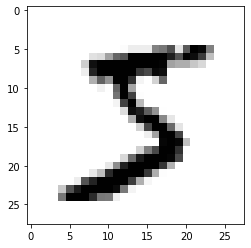

In [72]:
plt.imshow(some_digit, cmap='binary')
plt.show()

In [73]:
y.loc[0]

'5'

In [74]:
y = y.astype(np.uint8)

*Changing type of y from string to integer*`

### Train test split

In [75]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Preparing Labels for a digit-5-classifier

In [76]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Training a Stochastic Gradient Descent Model

In [77]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [78]:
sgd_clf.predict([X_train.loc[0]])

array([ True])

### Evaluating the model

**Evaluating a classifer is different from evaluating regressors. Accuracy may not be a good indicator of how a model performs. So, we use confusion matrix, precision, recall, f1_score, ROC curves**

In [79]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [80]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

- **53892 times the model said "True" and it was actually 'True'**
- **687 times it said "False" but it was actually 'True'**
- **1891 times it said "True" but it was actually 'False'**
- **3530 times it said "False" and it was actually 'False'**

**Precision:** Precision is the percentage of true predictions whenever the model predicts "True" <br>
**Recall:** Recall is the percentage of true classes actually detected     

In [81]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

prec_score = precision_score(y_train_5, y_train_pred)
rec_score = recall_score(y_train_5, y_train_pred)

rec_score

0.6511713705958311

**F1 Score:** F1 score is the harmonic mean of Precision and Recall. F1 score is only high when both Precision and Recall are high

In [82]:
def score(y_train, predictions):
    cf_matrix = confusion_matrix(y_train, predictions)
    prec_score = precision_score(y_train, predictions)
    rec_score = recall_score(y_train, predictions)
    acc_score = accuracy_score(y_train, predictions)
    f1_sc = f1_score(y_train, predictions)
    
    return cf_matrix, prec_score, rec_score, acc_score, f1_sc

In [83]:
score(y_train_5, y_train_pred)

(array([[53892,   687],
        [ 1891,  3530]], dtype=int64),
 0.8370879772350012,
 0.6511713705958311,
 0.9570333333333333,
 0.7325171197343846)

**SGD Classifier's decision function computes a score for a specific instance. It can be shown by decision_function()**

In [84]:
scores = sgd_clf.decision_function([X.loc[0]])

In [85]:
scores

array([2164.22030239])

**By default SGD uses 0 as threshold but you can make predictions using a different threshold**

In [86]:
threshold = 0
y_some_dig_pred = scores > threshold

In [87]:
y_some_dig_pred

array([ True])

In [88]:
# Increasing thresold will increase precision but it will decrease recall

threshold = 8000

y_some_dig_pred = scores > threshold

In [89]:
y_some_dig_pred

array([False])

In [90]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [91]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

### Precision drops as recall rises and vice versa

In [92]:
from sklearn.metrics import precision_recall_curve

In [93]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [94]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")


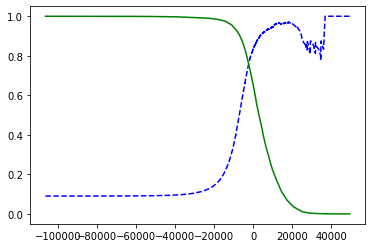

In [95]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


### Threshold that gives a specific precision

In [96]:
threshold_90_prec = thresholds[np.argmax(precisions >= 0.90)]

In [97]:
y_train_pred_90 = y_scores > threshold_90_prec

In [98]:
precision_score(y_train_5, y_train_pred_90)

0.9

In [99]:
recall_score(y_train_5, y_train_pred_90)

0.47980077476480354

### ROC Curve is another way to evaluate a model's classification

In [100]:
from sklearn.metrics import roc_curve

In [101]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [102]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') #

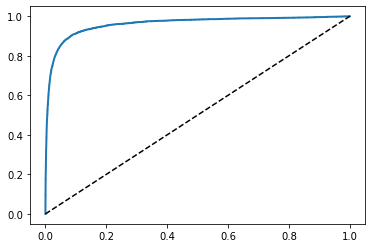

In [103]:
plot_roc_curve(fpr, tpr)
plt.show()

### Area under ROC Curve

In [104]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [105]:
from sklearn.ensemble import RandomForestClassifier 

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, method="predict_proba")

In [106]:
y_probas_forest

array([[0.14, 0.86],
       [0.99, 0.01],
       [0.98, 0.02],
       ...,
       [0.01, 0.99],
       [0.96, 0.04],
       [0.96, 0.04]])

In [107]:
y_scores_forest = y_probas_forest[:, 1] 

In [108]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

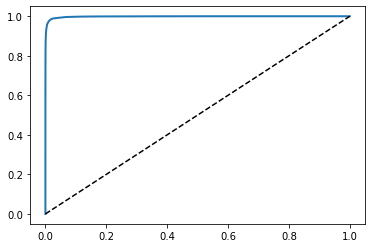

In [109]:
plot_roc_curve(fpr_forest, tpr_forest)
plt.show()

In [110]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores_forest)

0.998402186461512

### Comparing ROC curves of two different Classifiers

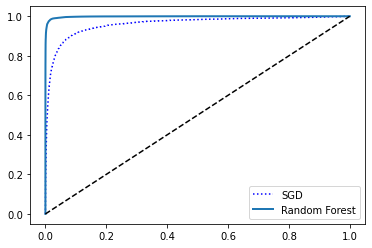

In [111]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()


**As you can see Random Forest has higher area under ROC curve than SGD**

**Precision and recall for Random Forest**

In [112]:
forest_clf.fit(X_train, y_train_5)
y_rf_predict = forest_clf.predict(X_test)

In [113]:
precision_score(y_test_5,y_rf_predict)

0.993581514762516

In [114]:
recall_score(y_test_5, y_rf_predict)

0.8677130044843049

### Multi Class Classification

In [115]:
from sklearn.svm import SVC

In [116]:
svc_clf = SVC()

svc_clf.fit(X_train, y_train)

SVC()

In [117]:
svc_clf.predict([X_test.loc[60001]])

array([2], dtype=uint8)

**Svc_clf predicts 2**

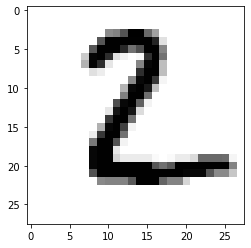

In [118]:
some_digit = X_test.loc[60001]
some_digit = np.array(some_digit).reshape(28,28)

plt.imshow(some_digit, cmap='binary')
plt.show()

**Correct Classification**

### Decision Scores for Multiple Classes

In [119]:
decision_scores = svc_clf.decision_function([X_test.loc[60001]])

In [120]:
decision_scores

array([[ 4.18553231,  4.18761078,  9.31442588,  8.29394839,  0.68969725,
         5.27476167,  7.28364539, -0.31459029,  5.28430293,  1.69121956]])

**There are 10 decision scores, one for each class. The maximum score is that of 2, hence, model predicts 2**

In [121]:
np.argmax(decision_scores)

2

**Classes are stored in the classes_ attribute of our classifier object**

In [122]:
svc_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### OvR vs OvO strategies

**One vs Rest strategy** involves making n classifiers for n classes. One for each class. In this case, 10 classifiers, 1-detector, 2-detector, 3-detector and so on. When classifying an image we pass it through all classifiers and get the scores, then we select the one with the highest score <br>
**One vs One strategy** involves making n * (n-1)/2 classifiers for n classes. In this case, we will make 1vs2 classifier, 1vs2 classifer, 1vs3 classifier and so on. It will take 45 classes in this case. When we are making a classification, we will pass our image through all 45 classifiers and select the class which wins the most duels.

In [123]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [126]:
sgd_clf.predict([X_train.loc[1]])

array([0], dtype=uint8)

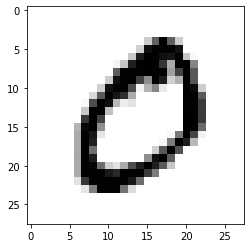

In [127]:
some_digit = X_train.loc[1]
some_digit = np.array(some_digit).reshape(28,28)

plt.imshow(some_digit, cmap='binary')
plt.show()

In [130]:
sgd_clf.decision_function([X_train.loc[1]])

array([[ 14390.59839396, -36919.31719967,  -9811.47434817,
         -8054.56345089, -21825.25725463, -11313.62371972,
        -23649.39025808, -15986.78463914,  -3798.52944589,
        -10635.46503726]])

In [133]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [139]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

### Error Analysis

In [141]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [142]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]],
      dtype=int64)

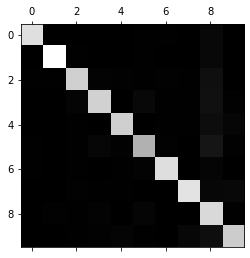

In [143]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)

In [144]:
sum_rows = conf_matrix.sum(axis=1, keepdims=True)

In [145]:
sum_rows

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

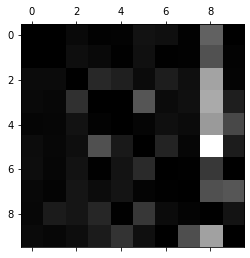

In [149]:
norm_conf_matrix = conf_matrix / sum_rows

np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()

**Hence, it is evident from this map that whenever model predicts 8, it is wrong the most. Also, 5 and 3 are confused both ways**